<a href="https://colab.research.google.com/github/lightucha/how-to-opencv/blob/main/opencv_210830.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 패캠 openCV ch07 Review 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(cv2.__version__)

4.1.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
gpath = '/content/drive/MyDrive/1.Project/{PATH}/'

### 영상의 이진화(Binarization)
영상의 픽셀 값을 0 또는 255(1)로 만드는 연산
- 배경(background) vs. 객체(object)
- 관심 영역 vs. 비관심 영역

그레이스케일 영상의 이진화

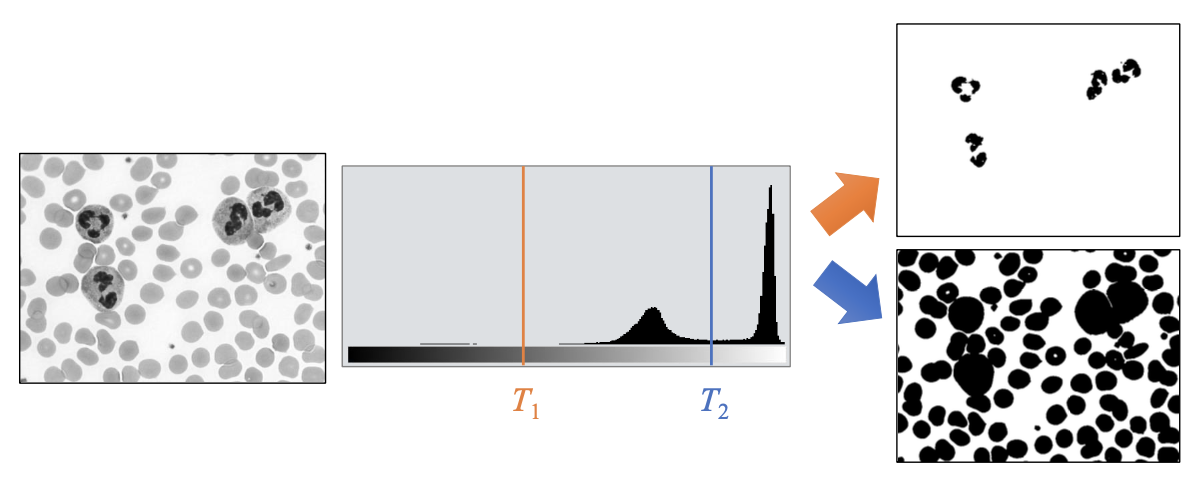

<b>cv2.threshold(src, thresh, maxval, type, dst=None) -> retval, dst</b>
- maxval: 보통 255로 지정
- type: 임계값 함수 동작 지정 or 자동 임계값 결정 방법
- retval: 사용된 임계값

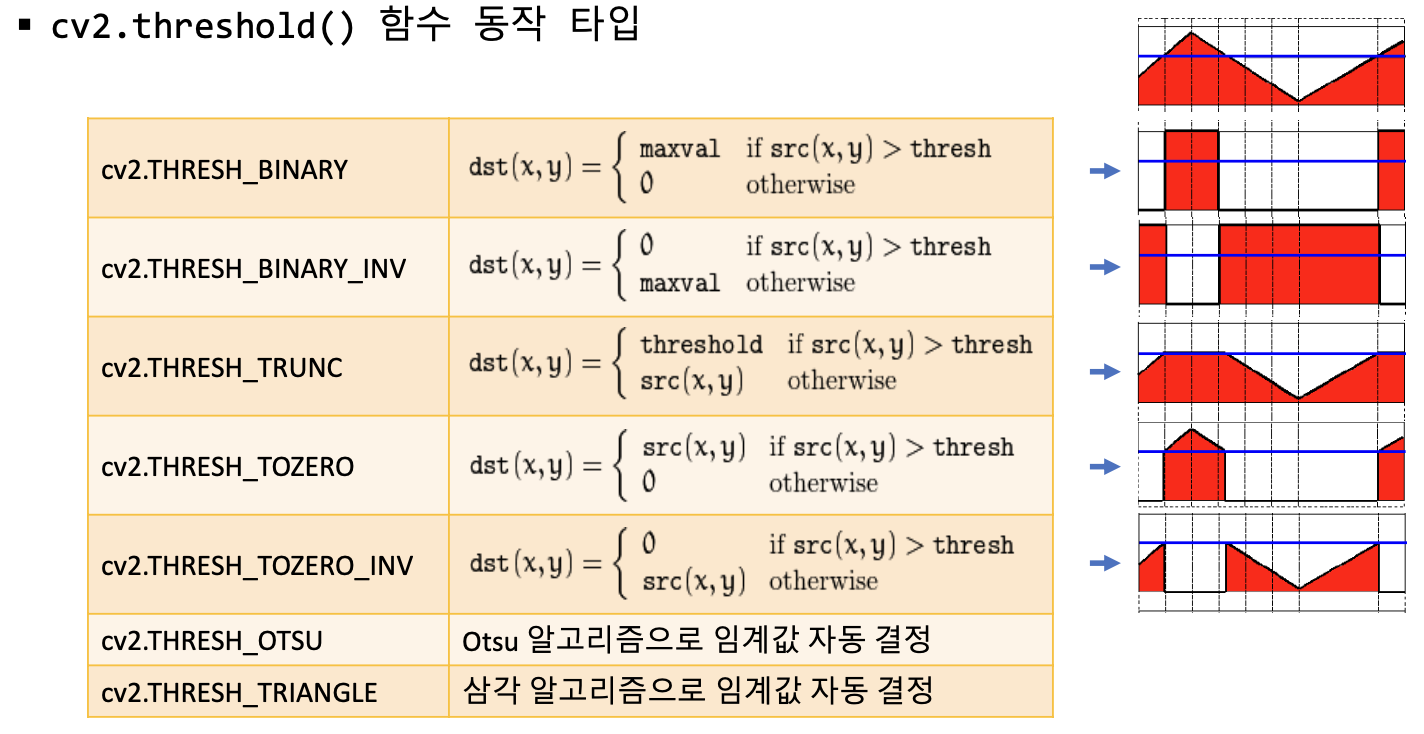

주로, THRESH_BINARY or THRESH_BINARY_INV 사용

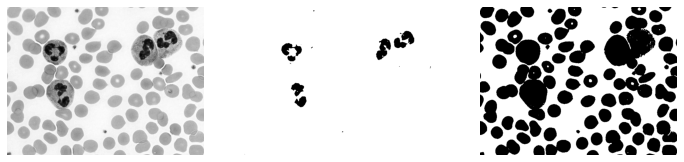

In [4]:
src = cv2.imread(gpath + 'ch07/cells.png', cv2.IMREAD_GRAYSCALE)

_, dst1 = cv2.threshold(src, 100, 255, cv2.THRESH_BINARY) 
_, dst2 = cv2.threshold(src, 210, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,8))
plt.subplot(131); plt.imshow(src, cmap='gray'); plt.axis('off')
plt.subplot(132); plt.imshow(dst1, cmap='gray'); plt.axis('off')
plt.subplot(133); plt.imshow(dst2, cmap='gray'); plt.axis('off')

plt.show()

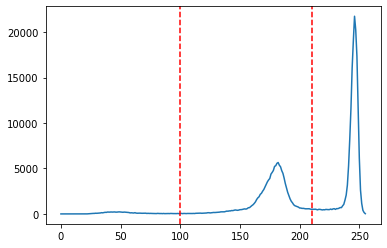

In [5]:
hist = cv2.calcHist([src], [0], None, [256], [0, 256])
plt.plot(hist)
plt.axvline(x=100, color='r', linestyle='--')
plt.axvline(x=210, color='r', linestyle='--')
plt.show()

임계값 자동 결정?

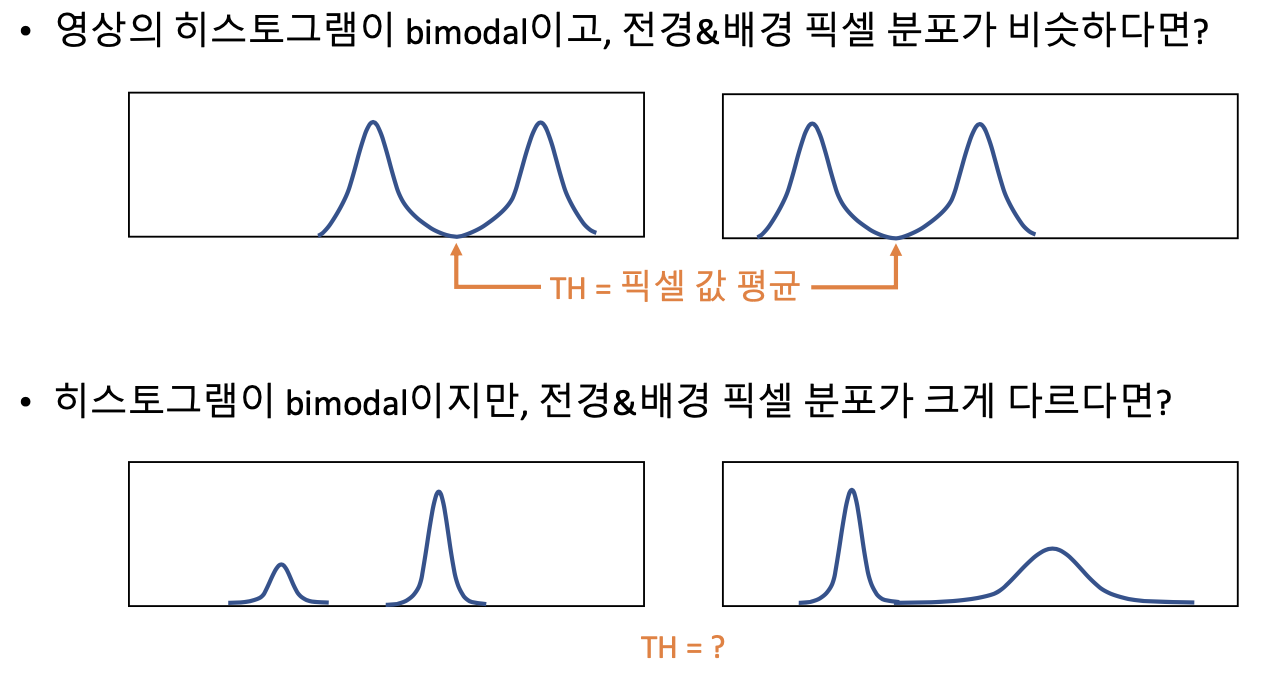

### 자동 이진화: Otsu 방법
이진화의 임계값을 구분하는 가장 좋은 방법으로 많이 이용
- 입력 영상이 배경과 객체로 구성되어 있다고 가정 -> Bimodal histogram
- 임의의 임계값 T에 의해 나눠지는 두 픽셀 분포 그룹의 분산이 최소가 되는 T를 선택

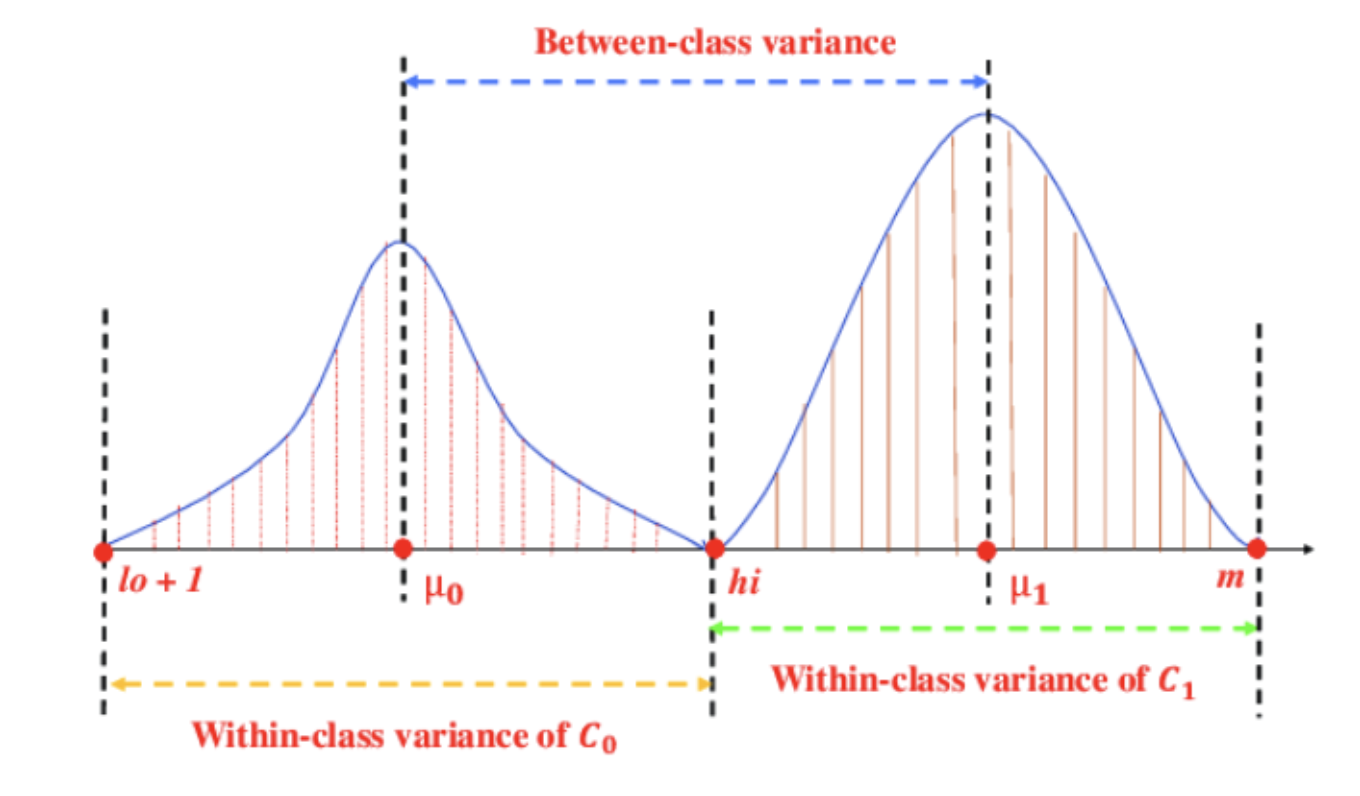

Otsu 이진화 방법: Within-class variance 최소화 -> Between-class variance 최대화

In [6]:
src = cv2.imread(gpath+'ch07/rice.png', cv2.IMREAD_GRAYSCALE)

# or 연산자로 OTSU 인자 입력
# 반환값 2개, 1개는 OTSU 임계값(실수형), 1개는 dst영상
# cv2.THRESH_OTSU 만 입력해도 됌
th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("otsu's threshold:", th)  # 131

otsu's threshold: 131.0


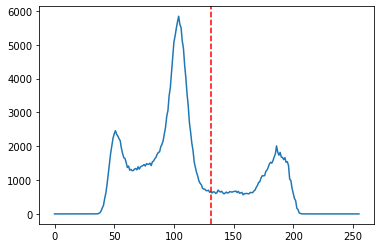

In [7]:
hist = cv2.calcHist([src], [0], None, [256], [0, 256])
plt.plot(hist)
plt.axvline(x=th, color='r', linestyle='--')
plt.show()

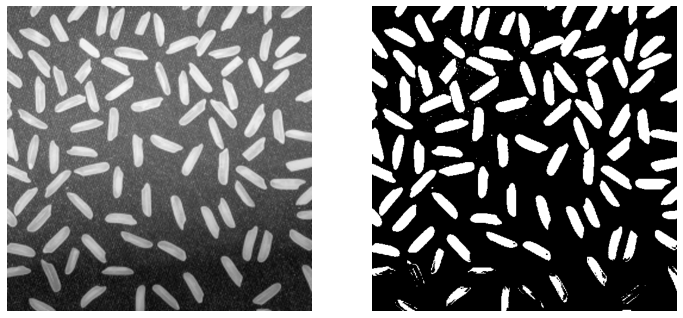

In [8]:
plt.figure(figsize=(12,8))

plt.subplot(121); plt.imshow(src, cmap='gray'); plt.axis('off')
plt.subplot(122); plt.imshow(dst, cmap='gray'); plt.axis('off')
plt.show()

### 지역 이진화
- 균일하지 않은 조명 환경에서 촬영된 영상의 이진화

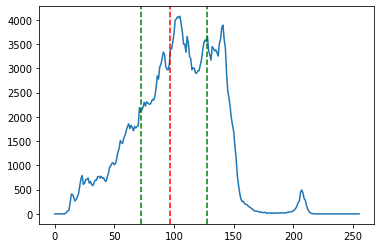

In [9]:
src = cv2.imread(gpath + 'ch07/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
plt.plot(hist)
plt.axvline(x=th, color='r', linestyle='--')
plt.axvline(x=72, color='g', linestyle='--')
plt.axvline(x=128, color='g', linestyle='--')
plt.show()

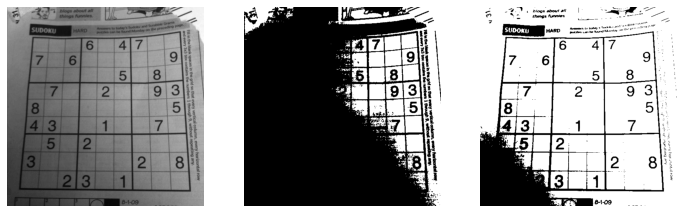

In [10]:
_, dst1 = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY) 
_, dst2 = cv2.threshold(src, 72, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,8))
plt.subplot(131); plt.imshow(src, cmap='gray'); plt.axis('off')
plt.subplot(132); plt.imshow(dst1, cmap='gray'); plt.axis('off')
plt.subplot(133); plt.imshow(dst2, cmap='gray'); plt.axis('off')

plt.show()

### 1. 구역을 나눠서 Otsu 이진화
- 전체 구역을 N등분 하고 각각의 구역을 이진화
- 여러 개의 임계값을 이용

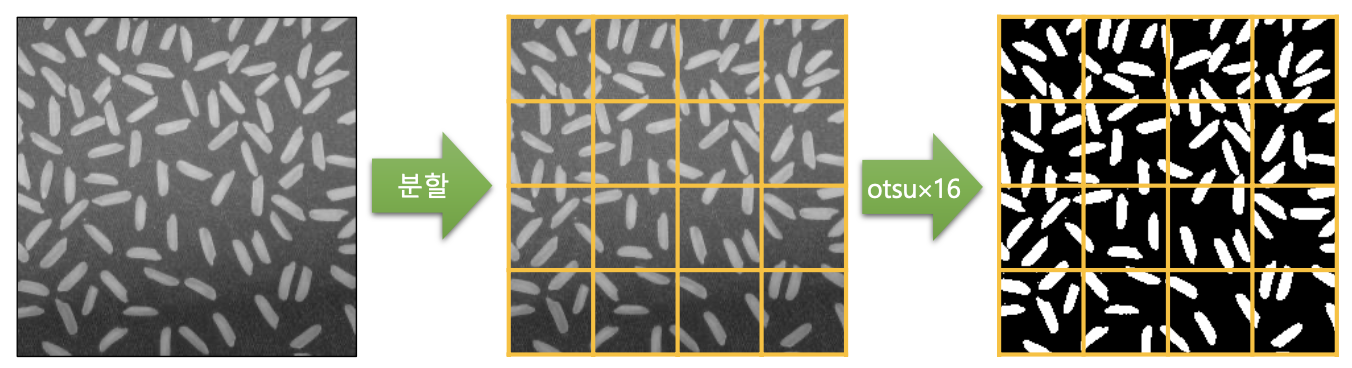

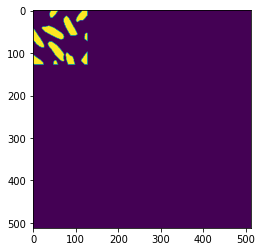

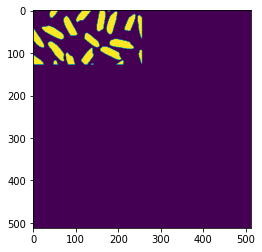

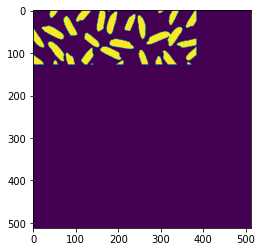

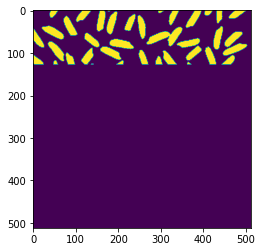

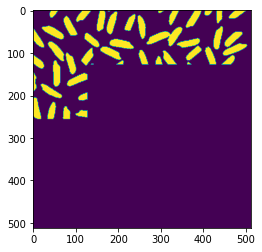

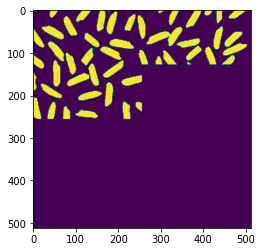

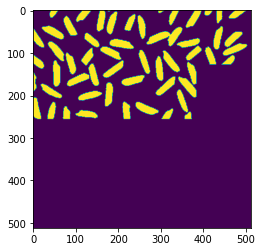

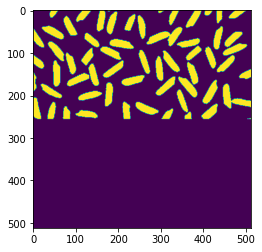

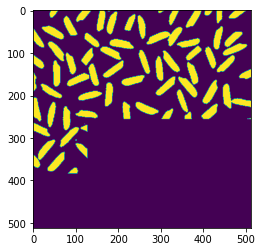

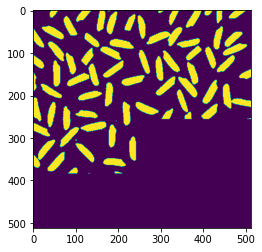

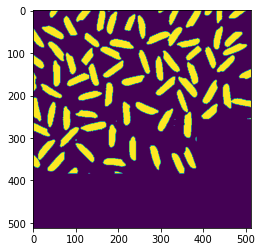

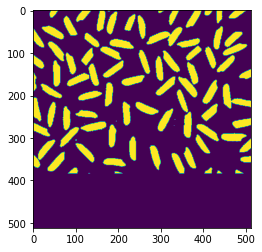

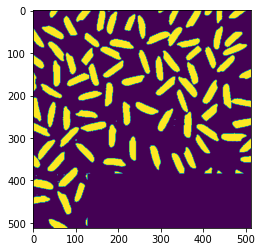

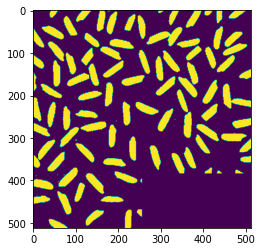

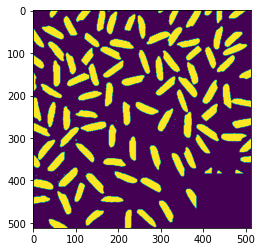

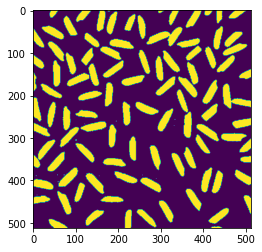

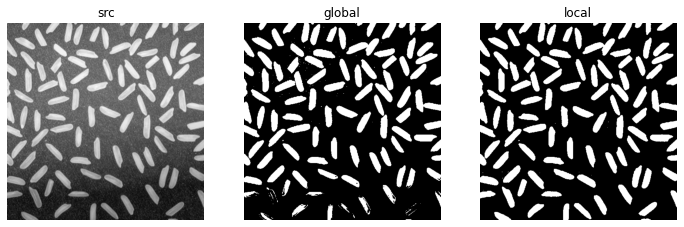

In [11]:
src = cv2.imread(gpath + 'ch07/rice.png', cv2.IMREAD_GRAYSCALE)
    
# 전역 이진화
_, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 지역 이진화
dst2 = np.zeros(src.shape, np.uint8) # 검정색 영상

# 넓이 / 4, 높이 / 4
bw = src.shape[1] // 4
bh = src.shape[0] // 4

# 가로 세로 4등분 하기
for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]   # threshold 입력값으로 주기 위해 입력 영상도 등분
        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw] # dst_를 변경하면 dst2도 변경됨
        
        # dst_를 입력인자로 주었습니다.
        # dst_를 입력인자로 입력하면 dst_를 입력이자 출력으로 받을 수 있습니다.
        # _, dst_ = cv2.~ 로 값을 받게 되면 등분한 dst_ 정보는 사라집니다.
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)
        
        plt.imshow(dst2)
        plt.show()

        
# 결과 출력
plt.figure(figsize=(12,8))
plt.subplot(131); plt.imshow(src, cmap='gray'); plt.axis('off'); plt.title('src')
plt.subplot(132); plt.imshow(dst1, cmap='gray'); plt.axis('off'); plt.title('global')
plt.subplot(133); plt.imshow(dst2, cmap='gray'); plt.axis('off'); plt.title('local')
plt.show()

### 2. 적응형 이진화
- 작동 방식: 가우시안 블러를 적용하여 노이즈를 제거 후 Otsu 이진화를 적용
- 1번 방법보다 느리다고 함

<b>cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C, dst=None)</b>
- blockSize: 블록 크기(3이상 홀수)
- C: 블록 내 평균값 or 블록 내 가중 평균값에서 뺄 값
 - (x, y) 픽셀의 임계값으로 $T(x,y)$ = ${\mu}_b(x,y)$ - $C$ 를 사용

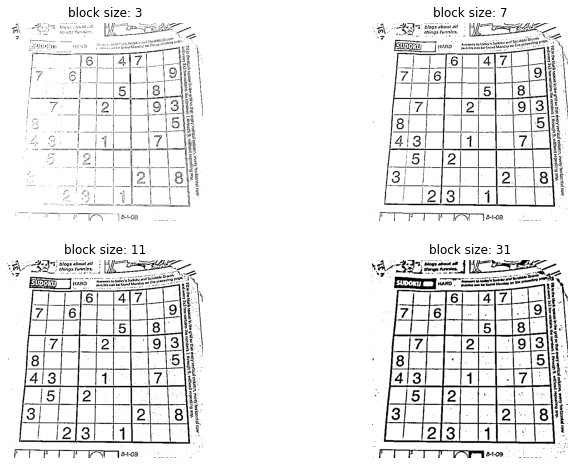

In [12]:
src = cv2.imread(gpath+'ch07/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,8))
for i, bsize in enumerate([3, 7, 11, 31]):
  dst = cv2.adaptiveThreshold(src, 
                              255, 
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                              cv2.THRESH_BINARY, bsize, 5) # C값은 5를 줌
  plt.subplot(2,2,i+1)
  plt.imshow(dst, cmap='gray')
  plt.axis('off')
  plt.title(f'block size: {bsize}')

plt.show()

### 모폴로지 (1): 침식과 팽창
- 영상을 형태학적인 측면에서 다루는 기법
- 전처리 또는 후처리 형태로 널리 사용

### 침식(erosion)과 팽창(dilation)
1. 침식 연산
 - 객체 외곽을 깎아내는 연산(객체 크기 감소 & 배경 확대)
 - 작은 크기의 객체(잡음)제거 효과

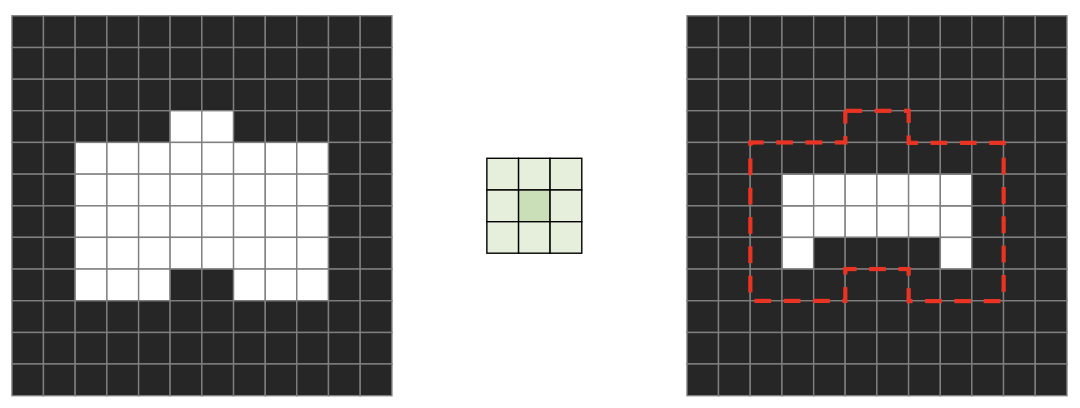

2. 팽창 연산
 - 객체 외곽을 확대시키는 연산(객체 크기 확대 & 배경 감소)
 - 객체 내부 홀이 채워짐

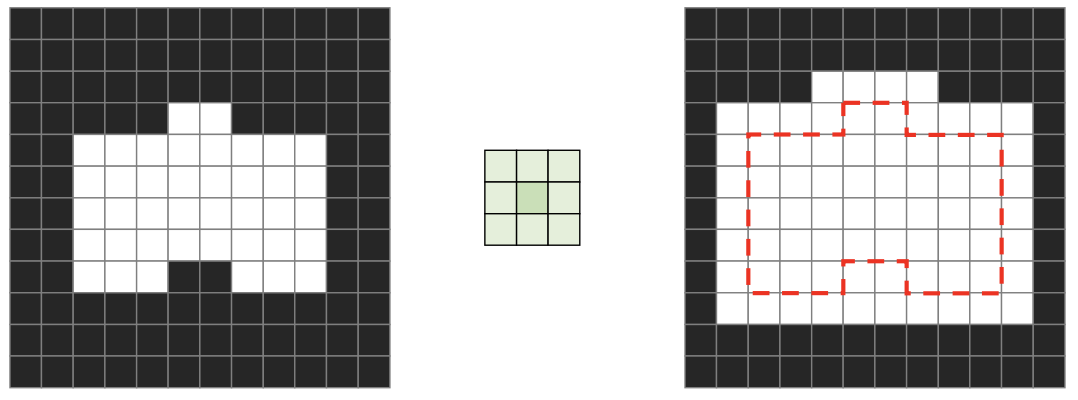

<b>cv2.erode(src, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None)</b>
- kernel: 구조 요소, None을 지정시 3x3 구성 요소 사용
- anchor: 고정점 위치, 기본값(-1,-1) 사용하면 중앙점을 사용

<b>cv2.dilate(src, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None)</b>
- kernel: 구조 요소, None을 지정시 3x3 구성 요소 사용
- anchor: 고정점 위치, 기본값(-1,-1) 사용하면 중앙점을 사용

<b>cv2.getStructuringElement(shape, ksize, anchor=None)</b>
- shape: 구조 요소 모양 플래그
- ksize: 구조 요소 크기 -> (w, h) 튜플

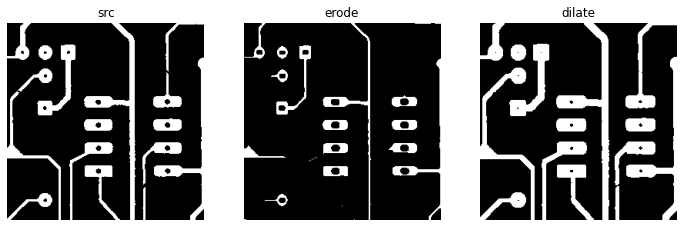

In [13]:
src = cv2.imread(gpath+'ch07/circuit.bmp', cv2.IMREAD_GRAYSCALE)

se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3)) # 가로 5, 세로 3
dst1 = cv2.erode(src, se)

# 만약 수직선이 단선됬을 때 위아래로 연결하고 싶다.
# 그러면 1x5 커널을 생성하면 됍니다.
dst2 = cv2.dilate(src, None) # 3x3 팽창 의미는 한픽셀정도만 팽창

plt.figure(figsize=(12,8))
plt.subplot(131); plt.imshow(src, cmap='gray'); plt.axis('off'); plt.title('src')
plt.subplot(132); plt.imshow(dst1, cmap='gray'); plt.axis('off'); plt.title('erode')
plt.subplot(133); plt.imshow(dst2, cmap='gray'); plt.axis('off'); plt.title('dilate')
plt.show()

### 모폴로지 (2): 열기와 닫기
1. 열기(opening) 연산: 침식(erosion) -> 팽창(dilation)
 - 노이즈 제거 용도로 많이 사용
2. 닫기(closing) 연산: 팽창(dilation) -> 침식(erosion)

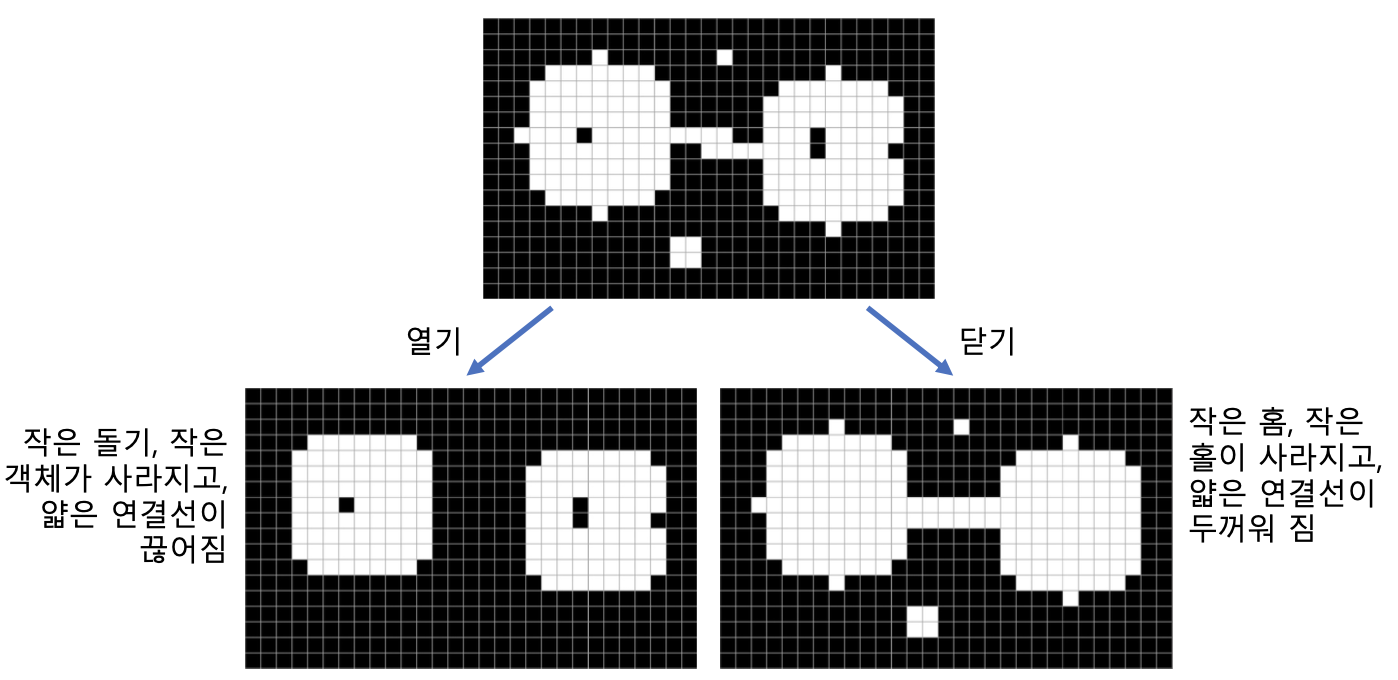

범용 모폴로지 연산 함수<p>
<b>cv2.morphologyEx(src, op, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None)</b>
- op: 모폴로지 연산 플래그

(512, 512)
cnt1: 113
cnt2: 99


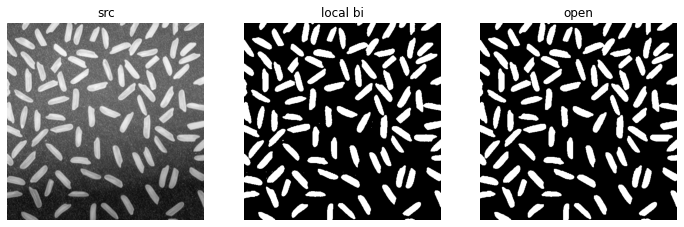

In [14]:
src = cv2.imread(gpath + 'ch07/rice.png', cv2.IMREAD_GRAYSCALE)
print(src.shape)

# src 영상에 지역 이진화 수행
dst1 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst1[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)
        
# 영상 안에 있는 흰색 덩어리를 정수 형태로 리턴
cnt1, _ = cv2.connectedComponents(dst1)
print('cnt1:', cnt1)

# 모폴로지 열기
dst2 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, None)

# 영상 안에 있는 흰색 덩어리를 정수 형태로 리턴
cnt2, _ = cv2.connectedComponents(dst2)
print('cnt2:', cnt2)
 
plt.figure(figsize=(12,8))
plt.subplot(131); plt.imshow(src, cmap='gray'); plt.axis('off'); plt.title('src')
plt.subplot(132); plt.imshow(dst1, cmap='gray'); plt.axis('off'); plt.title('local bi')
plt.subplot(133); plt.imshow(dst2, cmap='gray'); plt.axis('off'); plt.title('open')
plt.show()

### 레이블링(Labelling)
- 동일 객체에 속한 모든 픽셀에 고유한 번호를 매기는 작업
- 일반적으로 이진 영상에서 수행

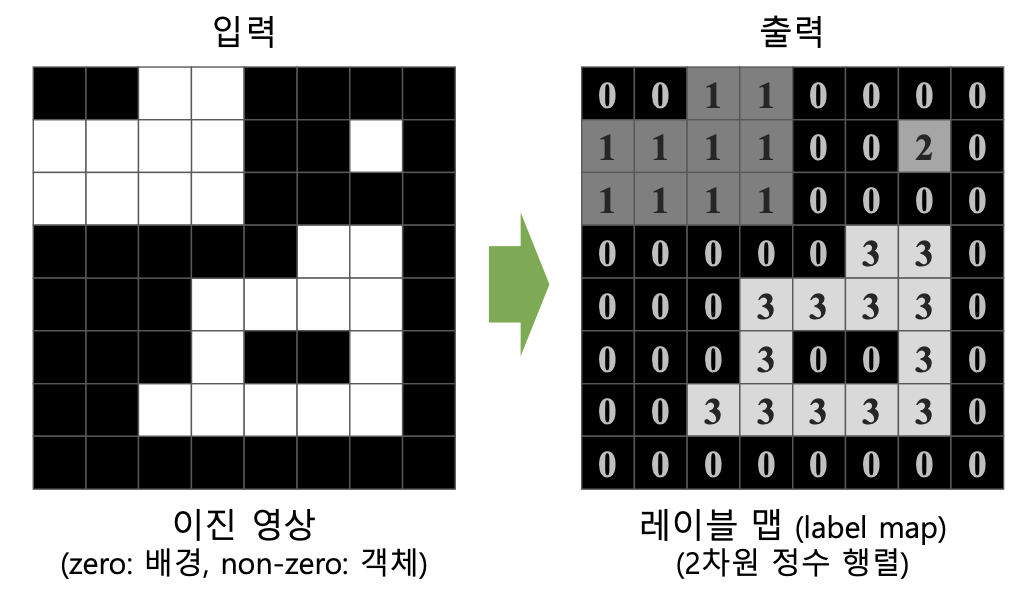

<b>cv2.connectedComponents(img, labels=None, connectivity=None, ltype=None) -> retval, dst</b>
- labels: 레이블맵 행렬, 입력과 같은 크기(numpy.ndarray)
- connectivity: 4 또는 8(기본값 8)
- retval: 객체 개수(0은 배경을 의미)

객체 정보를 함께 반환하는 레이블링 함수<p>
<b>cv2.connectedComponentsWithStats(img, labels=None, stats=None, centroids=None,  connectivity=None, ltype=None) -> retval, labels, stats, centroids</b>
- img: 8비트 1채널 영상
- labels: 레이블맵 행렬, 입력과 같은 크기(numpy.ndarray)
- stats: 각 객체의 바운딩 박스, 픽셀 개수 정보를 담은 행렬
- centroids: 각 객체의 무게 중심 위치 정보를 담은 행렬

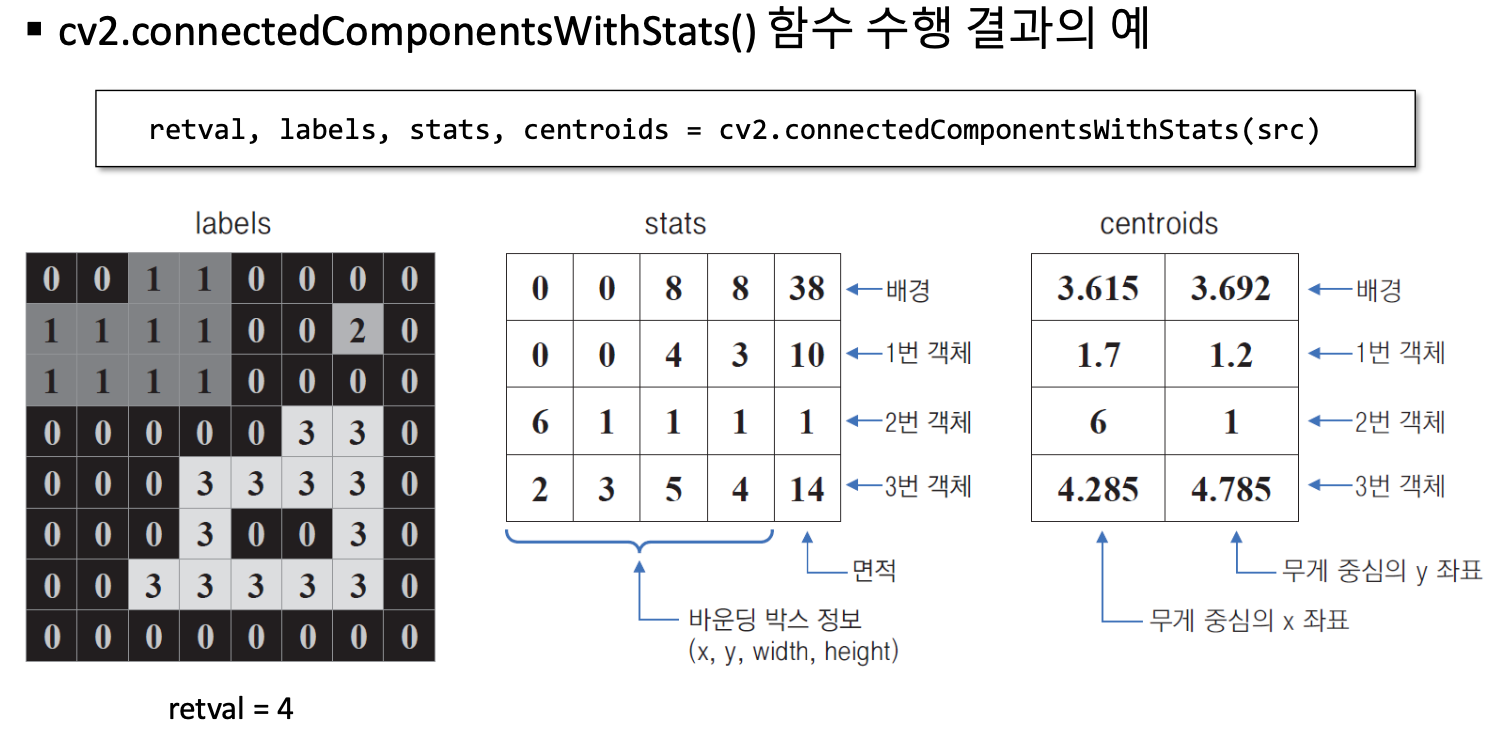

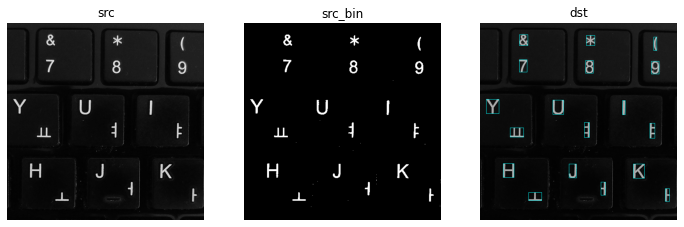

In [15]:
src = cv2.imread(gpath+'ch07/keyboard.bmp', cv2.IMREAD_GRAYSCALE)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(1, cnt): # 각각의 객체 정보에 들어가기 위해 반복문. 범위를 1부터 시작한 이유는 배경을 제외
    (x, y, w, h, area) = stats[i]

    # 노이즈 제거
    if area < 20:
        continue

    cv2.rectangle(dst, (x, y, w, h), (0, 255, 255))

plt.figure(figsize=(12,8))
plt.subplot(131); plt.imshow(src, cmap='gray'); plt.axis('off'); plt.title('src')
plt.subplot(132); plt.imshow(src_bin, cmap='gray'); plt.axis('off'); plt.title('src_bin')
plt.subplot(133); plt.imshow(dst, cmap='gray'); plt.axis('off'); plt.title('dst')
plt.show()

### 외곽선 검출
- 객체의 외곽선 좌표를 모두 추출하는 작업
- 외곽선의 계층 구조도 표현 가능

<b>cv2.findContours(image, mode, method, contours=None, hierarchy=None, offset=None) -> contours, hierarchy</b>
- image: 입력 영상. non-zero 픽셀을 객체로 간주함.

- mode: 외곽선 검출 모드. cv2.RETR_로 시작하는 상수.

- method: 외곽선 근사화 방법. cv2.CHAIN_APPROX_로 시작하는 상수.

- contours: 검출된 외곽선 좌표. numpy.ndarray로 구성된 리스트. len(contours)=전체 외곽선 개수(N). contours[i].shape=(K, 1, 2). contours[i].dtype=numpy.int32.

- hierarchy: 외곽선 계층 정보. numpy.ndarray. shape=(1, N, 4). dtype=numpy.int32. hierarchy[0, i, 0] ~ hierarchy[0, i, 3]이 순서대로 next, prev, child, parent 외곽선 인덱스를 가리킴. 해당 외곽선이 없으면 -1.

- offset: 좌표 값 이동 옵셋. 기본값은 (0, 0).

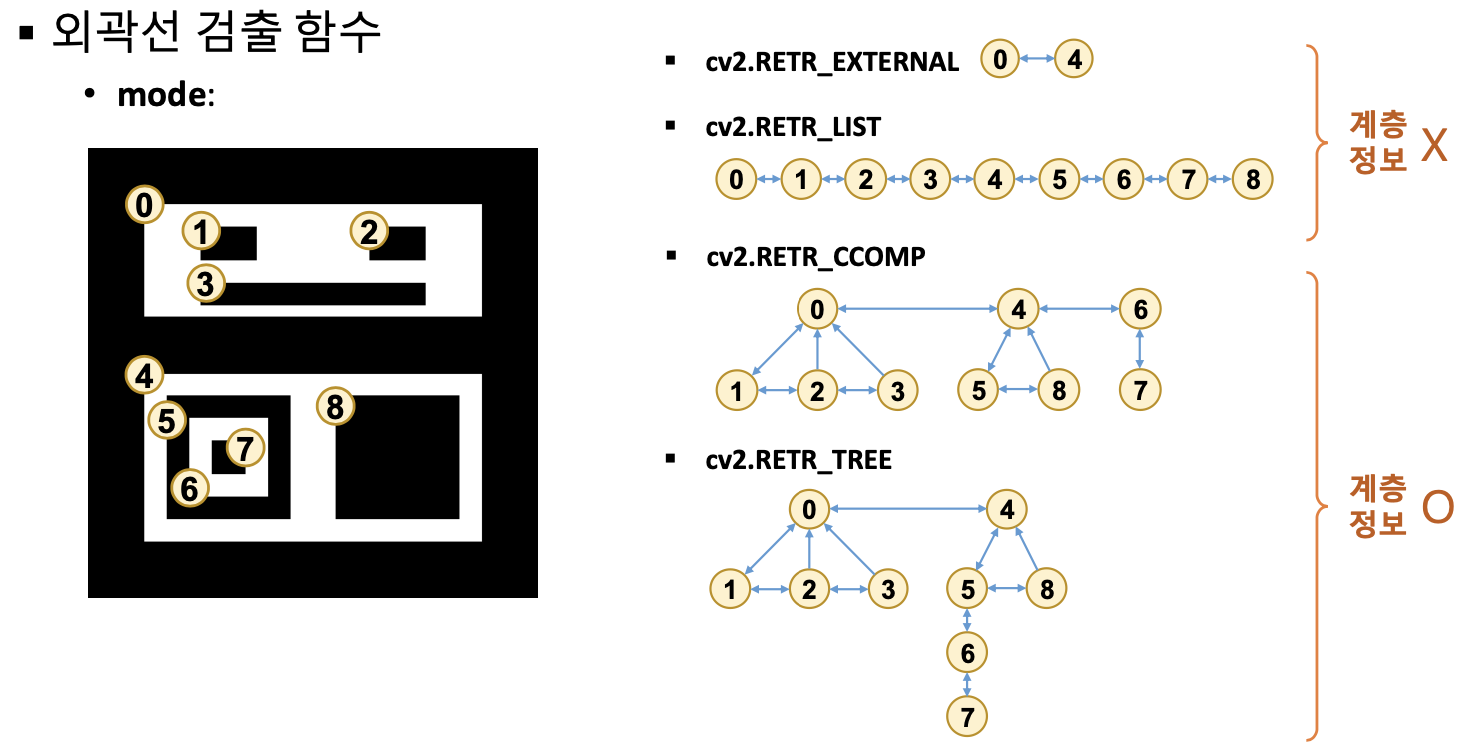

검출 외곽선 검증 역할<p>
<b>cv2.drawContours(image, contours, contourIdx, color, thickness=None, lineType=None, hierarchy=None, maxLevel=None, offset=None)</b>
- contourIdx: 외곽선 인덱스. 음수(-1)를 지정하면 모든 외곽선을 그린다

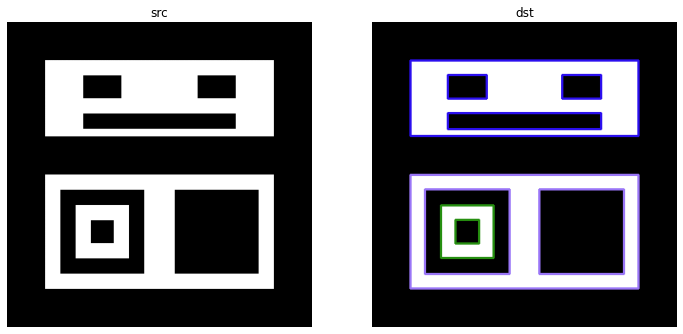

In [16]:
import random

src = cv2.imread(gpath+'ch07/contours.bmp', cv2.IMREAD_GRAYSCALE)

# 외곽선 정보 검출
contours, hier = cv2.findContours(src, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# 컬러 영상으로 변환
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

idx=0
while idx >= 0:
    # 랜덤 색상 지정
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
    # 외곽선 그리기
    # hier 계층 정보를 입력했으므로 모든 외곽선에 그림을 그리게 됩니다.
    cv2.drawContours(dst, contours, idx, c, 2, cv2.LINE_8, hier)
    
    # 0번째 계층만 그리기. 하지만 hier 계층 정보를 입력했기 때문에 모든 외곽선에 그림을 그립니다.
    # 계층 정보를 입력 안하면 0번 계층만 그립니다.
    idx = hier[0, idx, 0]

plt.figure(figsize=(12,8))
plt.subplot(121); plt.imshow(src, cmap='gray'); plt.axis('off'); plt.title('src')
plt.subplot(122); plt.imshow(dst, cmap='gray'); plt.axis('off'); plt.title('dst')
plt.show()

### 다양한 외곽선 함수

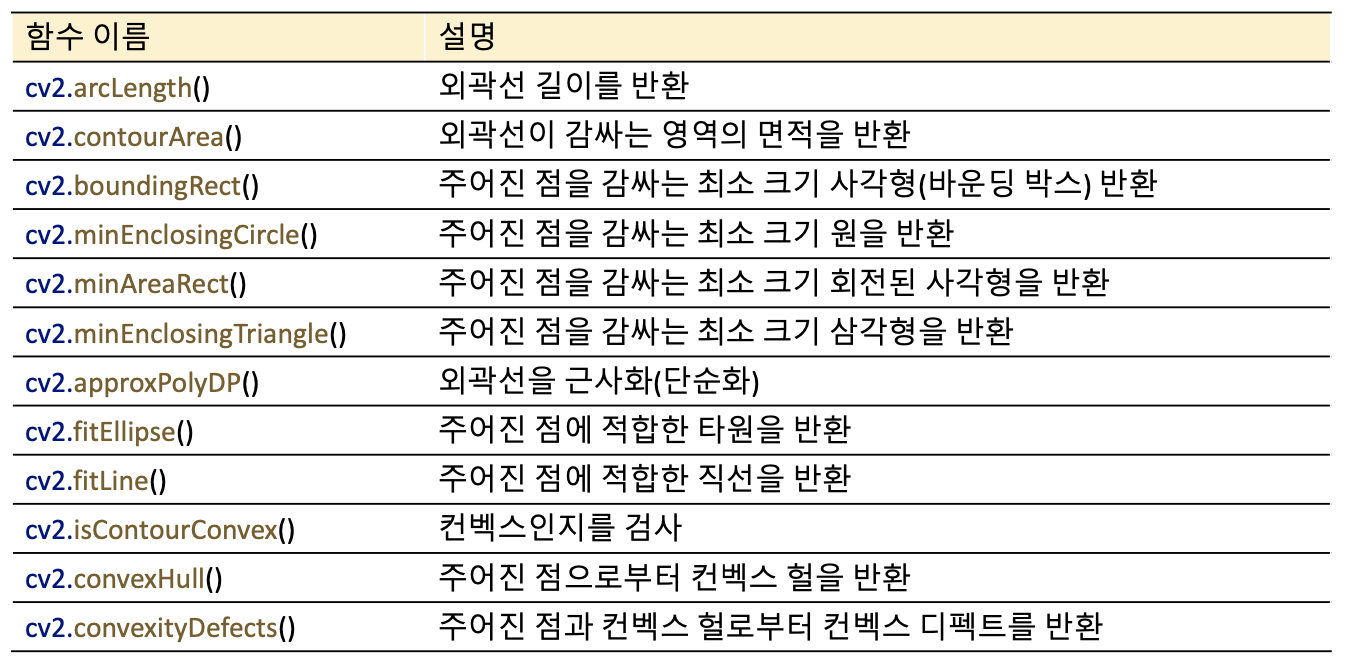

### 참고
어떤 집합안에서 2개의 지점을 선으로 연결했을 때, 그 선을 이루는 요소들이 그 집합 안에 속해 있다면 그 집합을 Convex set(볼록 집합)

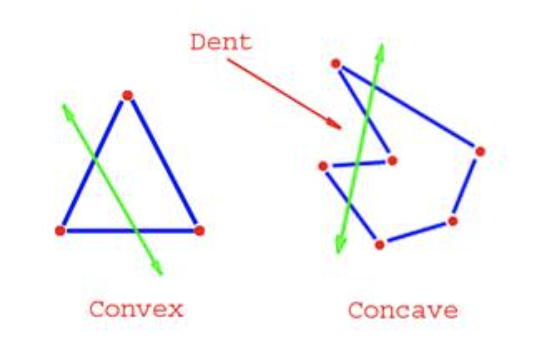

convex optimization: http://sanghyukchun.github.io/63/ <p>
convex hull: https://www.crocus.co.kr/1288